Compare ecopgg no transition with only action history

In [2]:
%run imports.ipynb
%run information_conditions.ipynb import Information_Conditions
%run base_ecopg.ipynb import BaseEcologicalPublicGood%run base_ecopg.ipynb
%run base_ecopg.ipynb import all_information_modes
%run helper_functions.ipynb import *
%run simulation_and_results_functions.ipynb import *

In [4]:
ecopg = BaseEcologicalPublicGood()
num_samples = 3
#Just to initialise a random startegy for the state set. This will be used to get the average policy for the given observation set



d:\Program_Files_D\Python\Lib\site-packages\matplotlib\quiver.py:695: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
d:\Program_Files_D\Python\Lib\site-packages\matplotlib\quiver.py:695: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


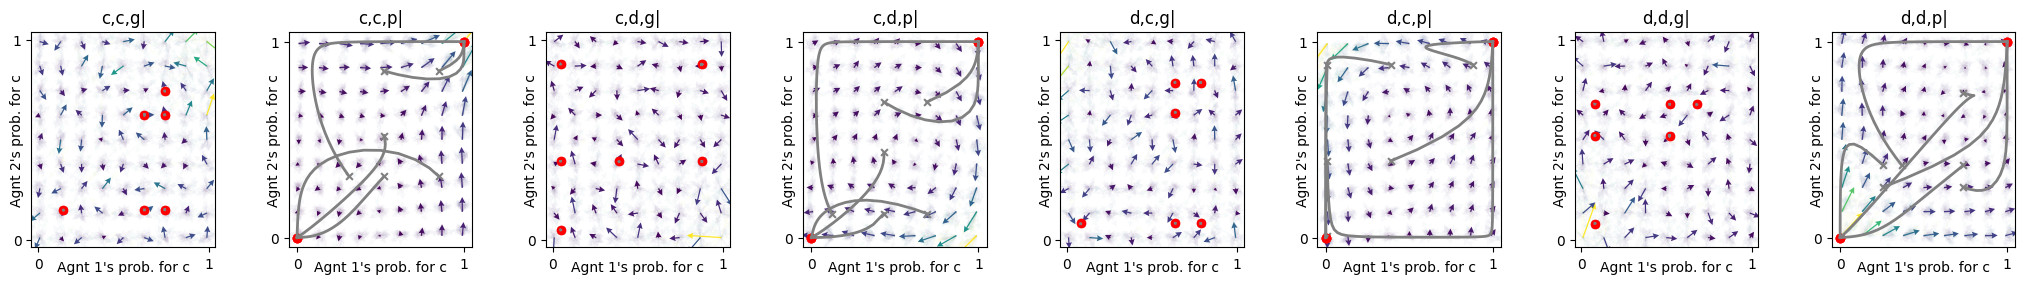

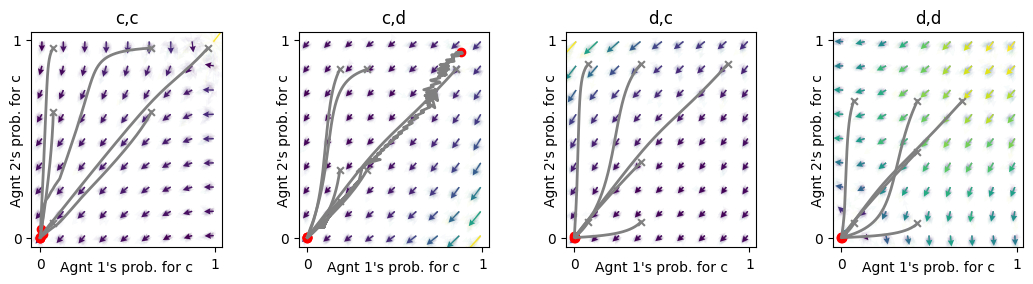

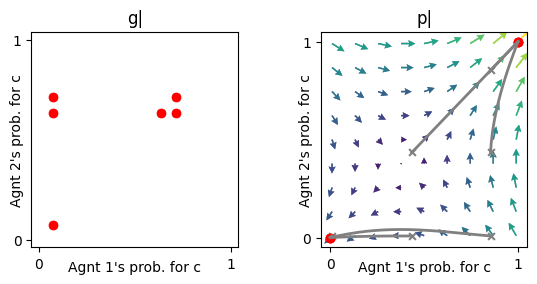

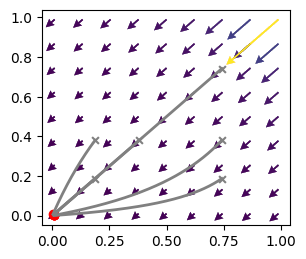

In [ ]:
for mode in ['both_state_and_action_information','only_action_history_information', 'only_state_information','no_information', ]:

    make_plots_ecopgg(ecopg, mode=mode, num_samples=num_samples)

In [12]:
def make_plots_socdi(socdi, num_samples):

    num_observed_states = len(socdi.Oset[0])
    x, y = ([0], list(range(num_observed_states)), [0]), ([1], list(range(num_observed_states)), [0])
    mae = POstratAC_eps(env=socdi, learning_rates=0.1, discount_factors=0.98)
    initial_conditions_list = lhs_sampling(mae.Q, num_samples, mae.N)

    ax = fp.plot_strategy_flow(
        mae,
        x, y, flowarrow_points=np.linspace(0.01, 0.99, 9), NrRandom=32,
        conds=np.array(socdi.Oset)[0, :num_observed_states],
        # col = 'blac'
    )

    for initial_condition in initial_conditions_list:
        xtraj, fixedpointreached = mae.trajectory(initial_condition, Tmax=10000, tolerance=1e-5)
        final_point = xtraj[-1]

        fp.plot_trajectories([xtraj], x, y, cols=['grey'], lss = "--", axes = ax)

        for plot_index, (x_indices,y_indicies) in enumerate(zip(it.product(*x), it.product(*y))):
            ax[plot_index].scatter(final_point[x_indices],final_point[y_indicies], color = 'red')

In [ ]:
socdi = SocialDilemma(R=1.0, T=1.2, S=-0.5, P=0.0)
memo1pd = HistoryEmbedded(socdi, h = (1, 1, 1))

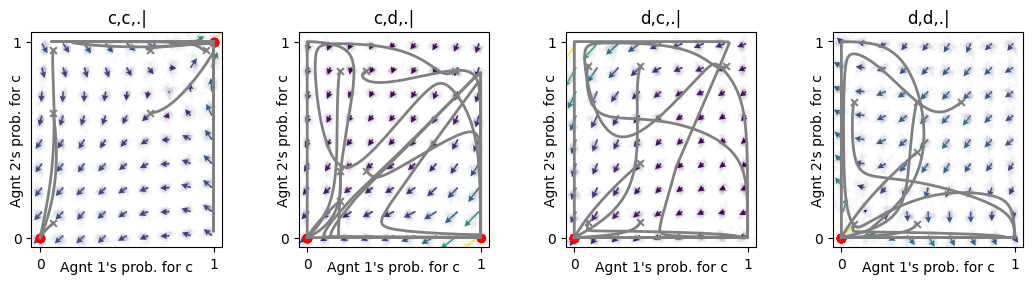

In [14]:
make_plots_socdi(memo1pd, num_samples=num_samples)